In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.regressionplots import influence_plot

In [99]:
#read the data

df = pd.read_csv("Cars.csv")

In [100]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [101]:
#independent features : HP,SP,VOL,WT
#dependent feature :MPG

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


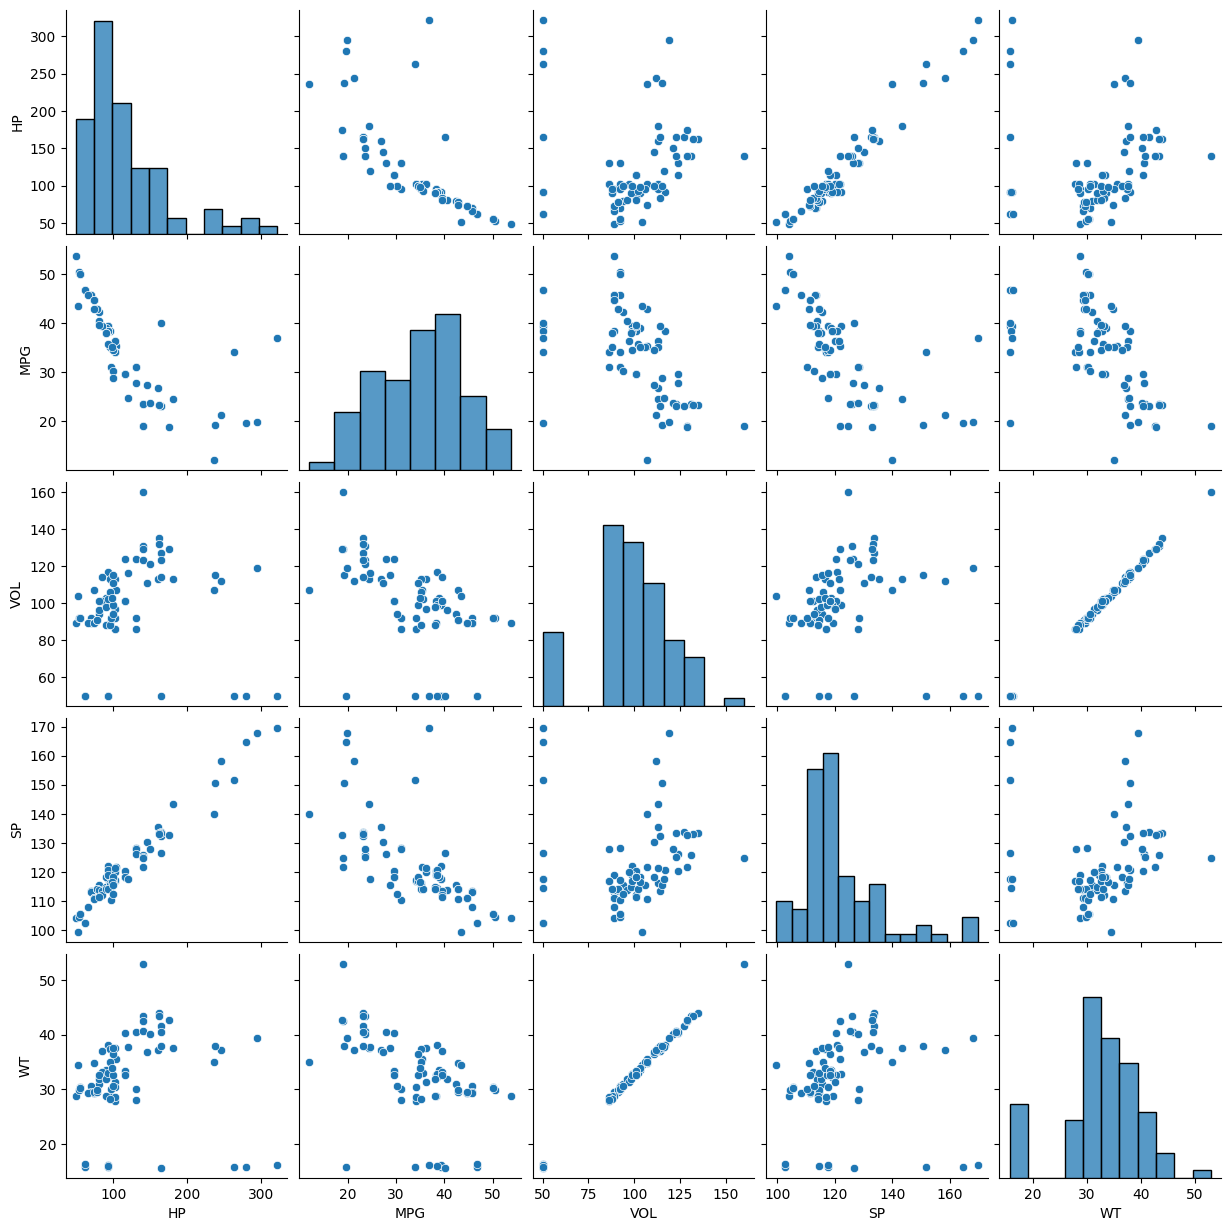

In [103]:
sns.pairplot(df)

In [104]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

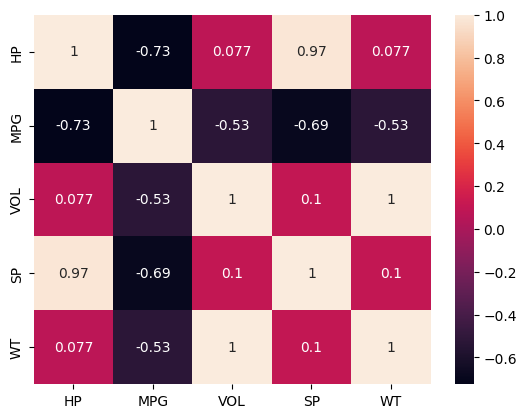

In [105]:
#heatmaps for correlations

sns.heatmap(df.corr(),annot=True)

In [106]:
#boxplots, univariate analysis, missing values (homework)

In [107]:
#building the model

model = smf.ols('MPG~WT+HP+SP+VOL',data=df).fit()


In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.54e-23
Time:                        13:12:58   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#simple linear regression using Vol and WT

mv = smf.ols('MPG~VOL',data=df).fit()

In [110]:
mv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.82e-07
Time:                        13:12:58   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
mv.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [112]:
mwt = smf.ols('MPG~WT',data=df).fit()
mwt.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [113]:
#VOL +WT

mvw = smf.ols('MPG~ VOL+WT',data=df).fit()
mvw.pvalues

Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64

In [114]:
#VOl and WT together is generating the problem of collinearity
#VIF

In [115]:
# VIF for vol

m1 = smf.ols('VOL~ WT+HP+SP',data=df).fit()
rs_vol = m1.rsquared
vif_vol = 1/(1-rs_vol)
vif_vol

638.8060836592878

In [116]:
# VIF for WT

m2 = smf.ols('WT~ VOL+HP+SP',data=df).fit()
rs_wt = m2.rsquared
vif_wt = 1/(1-rs_wt)
vif_wt

639.5338175572624

In [117]:
# VIF for HP

m3 = smf.ols('HP~ VOL+WT+SP',data=df).fit()
rs_hp = m3.rsquared
vif_hp = 1/(1-rs_hp)
vif_hp

19.926588974998563

In [118]:
# VIF for HP

m4 = smf.ols('SP~ VOL+WT+HP',data=df).fit()
rs_sp = m4.rsquared
vif_sp = 1/(1-rs_sp)
vif_sp

20.00763878305008

In [119]:
d1 = {"Variables":['HP','WT','VOL','SP'], "VIF":[vif_hp,vif_wt,vif_vol,vif_sp]}

In [120]:
d1

{'Variables': ['HP', 'WT', 'VOL', 'SP'],
 'VIF': [19.926588974998563,
  639.5338175572624,
  638.8060836592878,
  20.00763878305008]}

In [121]:
vif = pd.DataFrame(d1)

In [122]:
vif

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [123]:


# model using Vol, hp and sp

mod1 = smf.ols('MPG~ VOL+HP+SP',data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.56e-24
Time:                        13:12:58   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
print(mod1.aic)
print(mod1.rsquared)

475.9875158854609
0.770368341321302


In [125]:
# model using wt, hp and sp

mod2 = smf.ols('MPG~ WT+HP+SP',data=df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.81e-24
Time:                        13:12:58   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
#aic and r2 using wt,hp and sp

print(mod2.aic)
print(mod2.rsquared)

476.2992750152976
0.769482813998346


In [127]:
#aic and r2 using vol,hp and sp

print(mod1.aic)
print(mod1.rsquared)

475.9875158854609
0.770368341321302


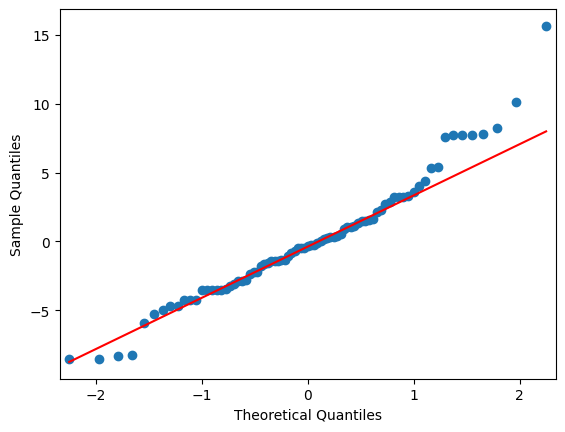

In [128]:
#test for normality

qqplot = sm.qqplot(mod1.resid,line="q")

In [129]:
#standardized values for both residuals and fitted values

def standardize1(v):
  eqn = (v - v.mean())/v.std()
  return eqn

Text(0, 0.5, 'standardized residual values')

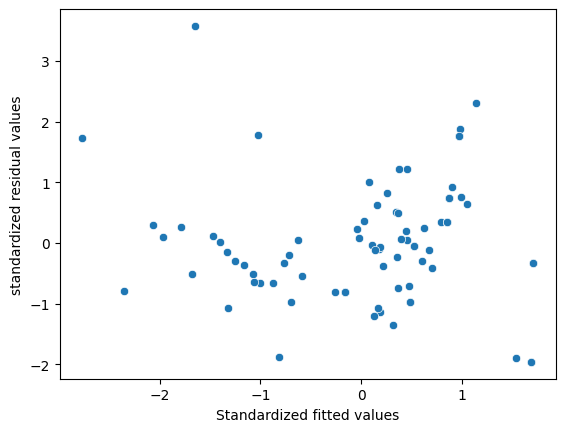

In [130]:
sns.scatterplot(x = standardize1(mod1.fittedvalues),y = standardize1(mod1.resid) )
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")

eval_env: 1


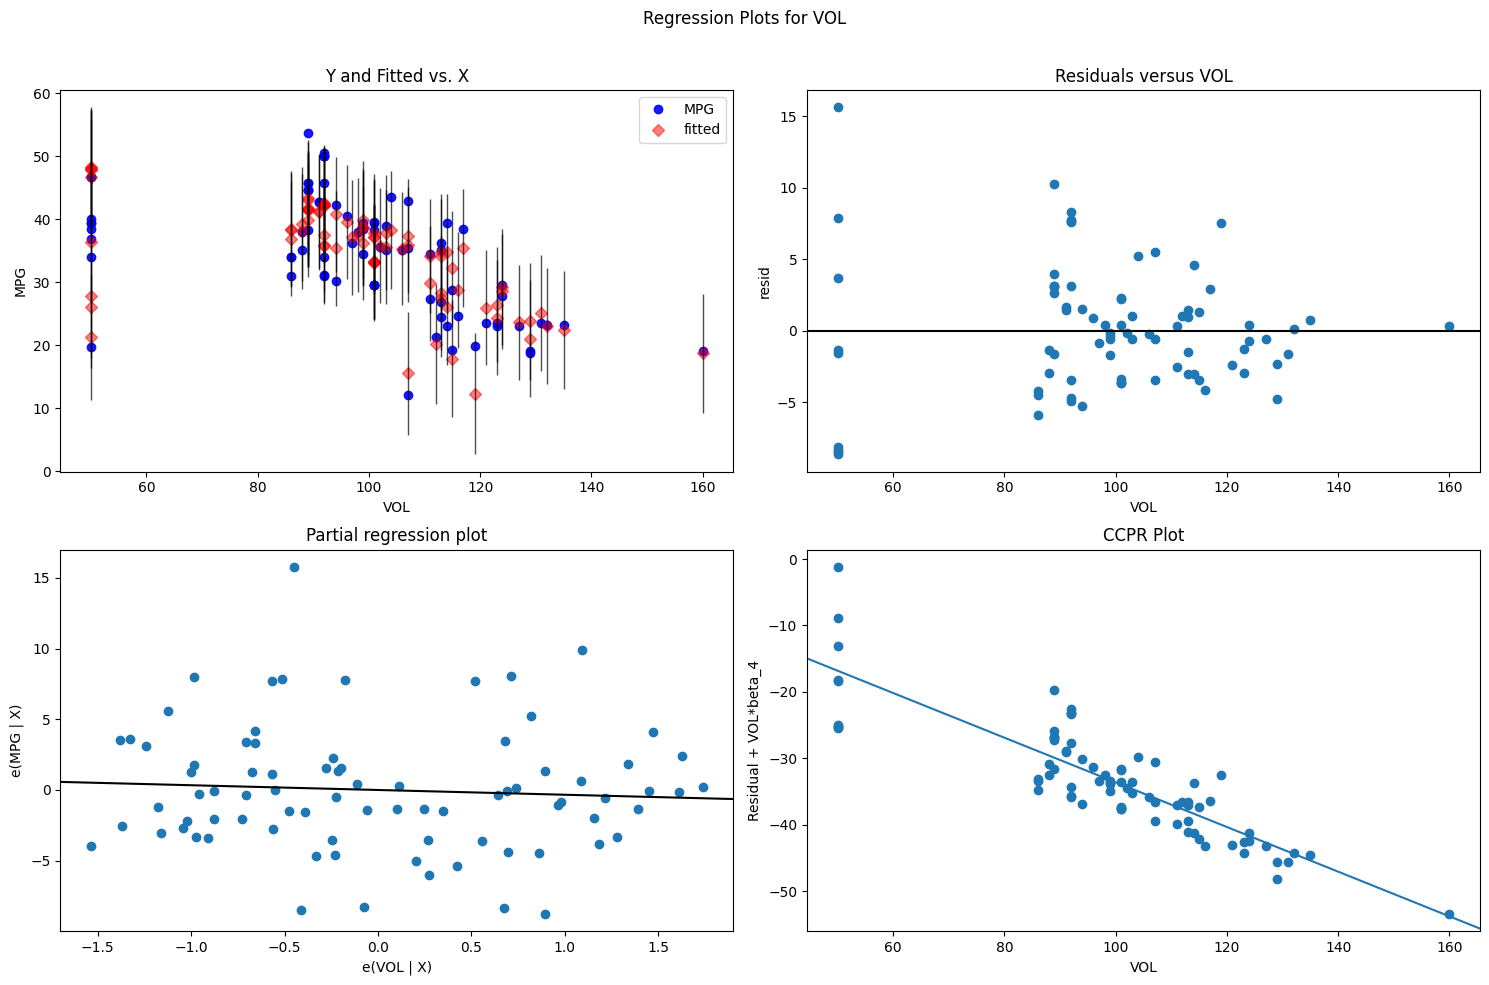

In [131]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"VOL",fig=fig)
plt.show()


eval_env: 1


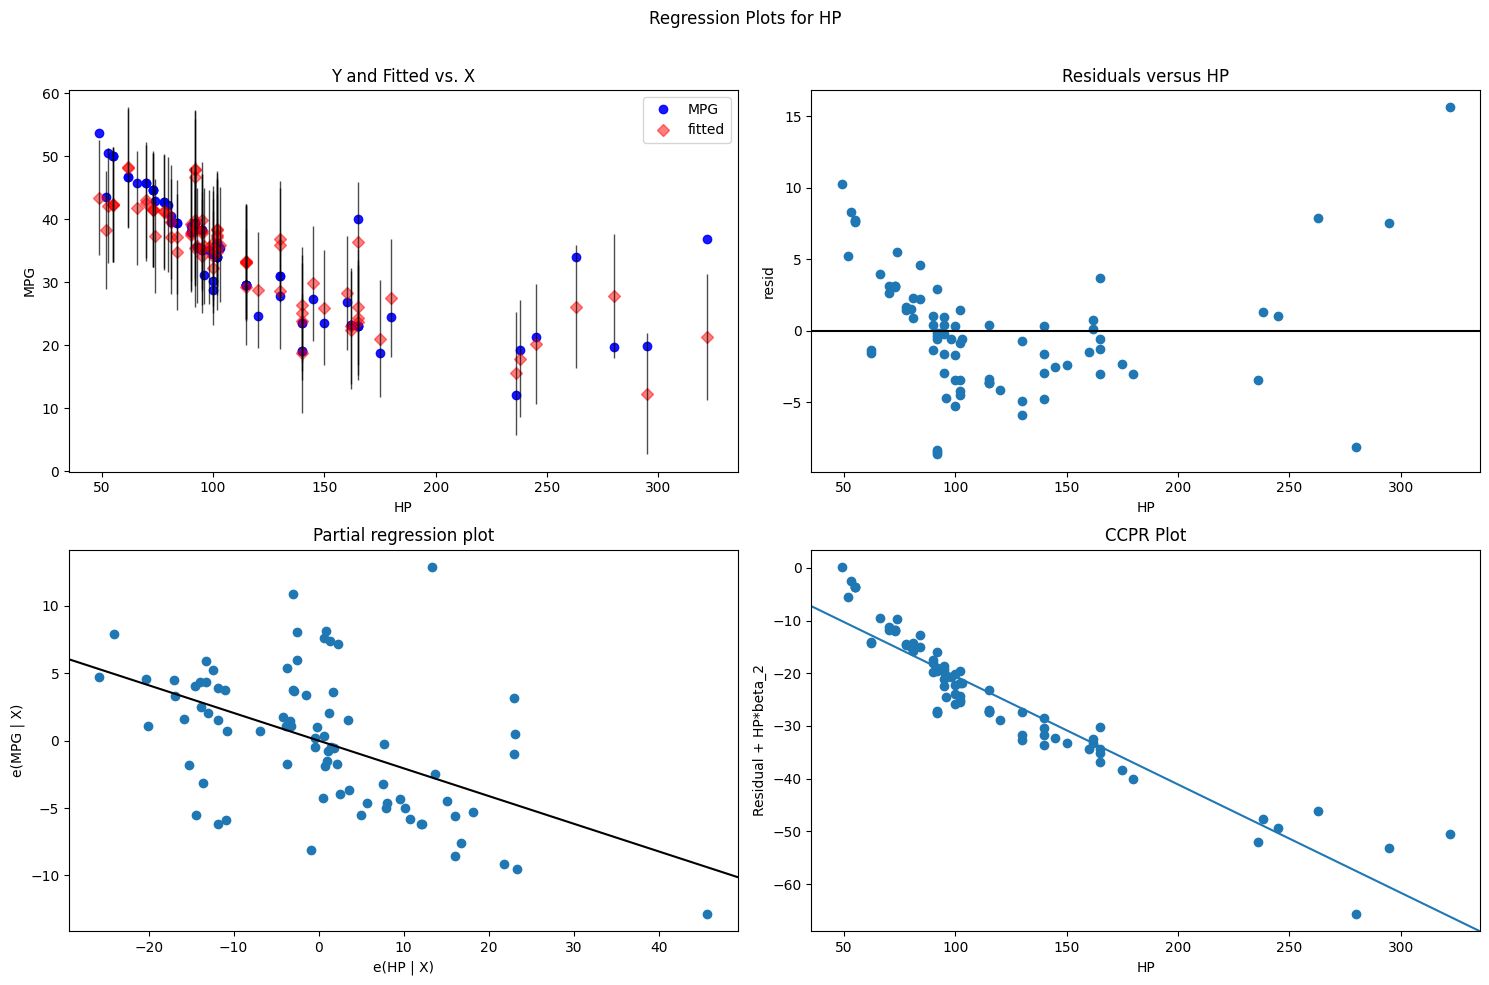

In [132]:

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()


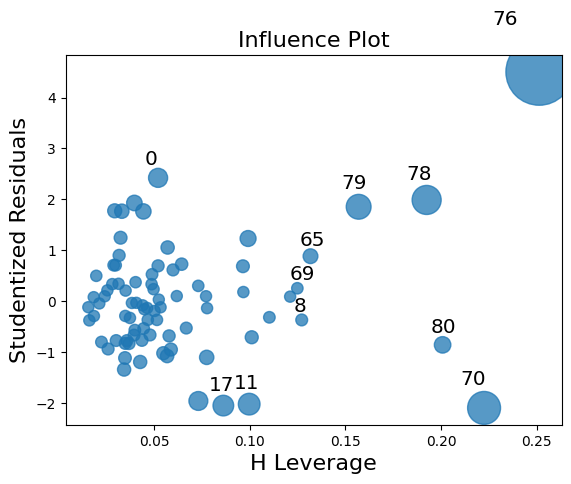

In [133]:
#detecting influencers/outliers

influence_plot(model)
plt.show()

In [134]:
df.shape

(81, 5)

In [135]:
k = df.shape[1] #no. features
n = df.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)

In [136]:
leverage_cutoff

0.2222222222222222

In [137]:
#retaining the original dataframe where multicollinaerity was handled

df1 = pd.read_csv("Cars.csv")

In [138]:
#model : mpg~vol+hp+sp
#drop 70 and 76 obs

df1 = df1.drop(df1.index[[70,76]],axis=0).reset_index()

In [139]:
df1.tail(10)

,index,HP,MPG,VOL,SP,WT
69,69,245,21.273708,112,158.300669,37.141733
70,71,162,23.203569,135,133.415985,44.013139
71,72,162,23.203569,132,133.140074,43.353123
72,73,140,19.086341,160,124.715241,52.997752
73,74,140,19.086341,129,121.864163,42.618698
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099
78,80,236,12.101263,107,139.840817,34.948615


In [140]:
df1 = df1.drop("index",axis=1)

In [141]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [142]:
#rebuild

mv= smf.ols("MPG~SP+HP+VOL",data=df1).fit()



In [143]:
mfv = mv.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

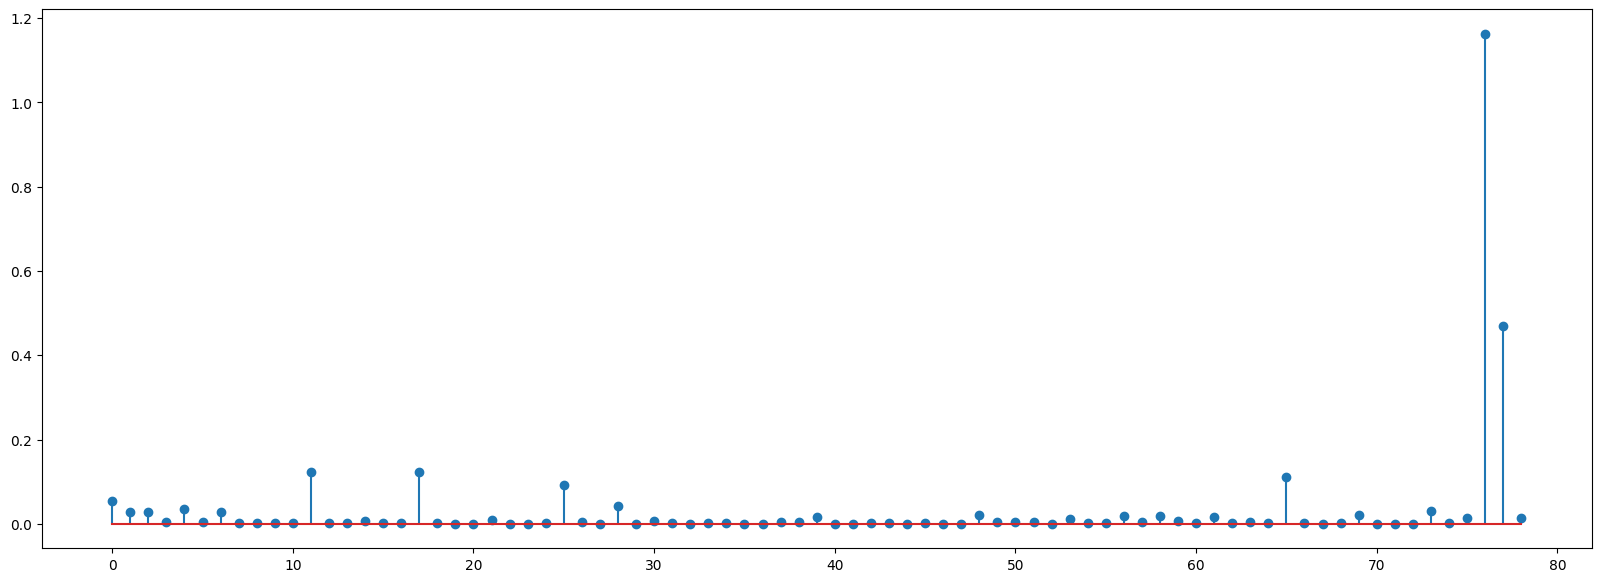

In [148]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [149]:
(np.argmax(cv),np.max(cv)) #which obs is holding the max value, what exactly is the maximum value

(76, 1.1629387469135195)

In [150]:
df1.drop(df1.index[76],axis=0,inplace=True)
df1 = df1.reset_index()

In [152]:
df1.drop("index",axis=1,inplace=True)

In [153]:
#rebuild

mv1 = smf.ols('MPG~VOL+HP+SP',data=df1).fit()

In [154]:
mfv = mv1.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

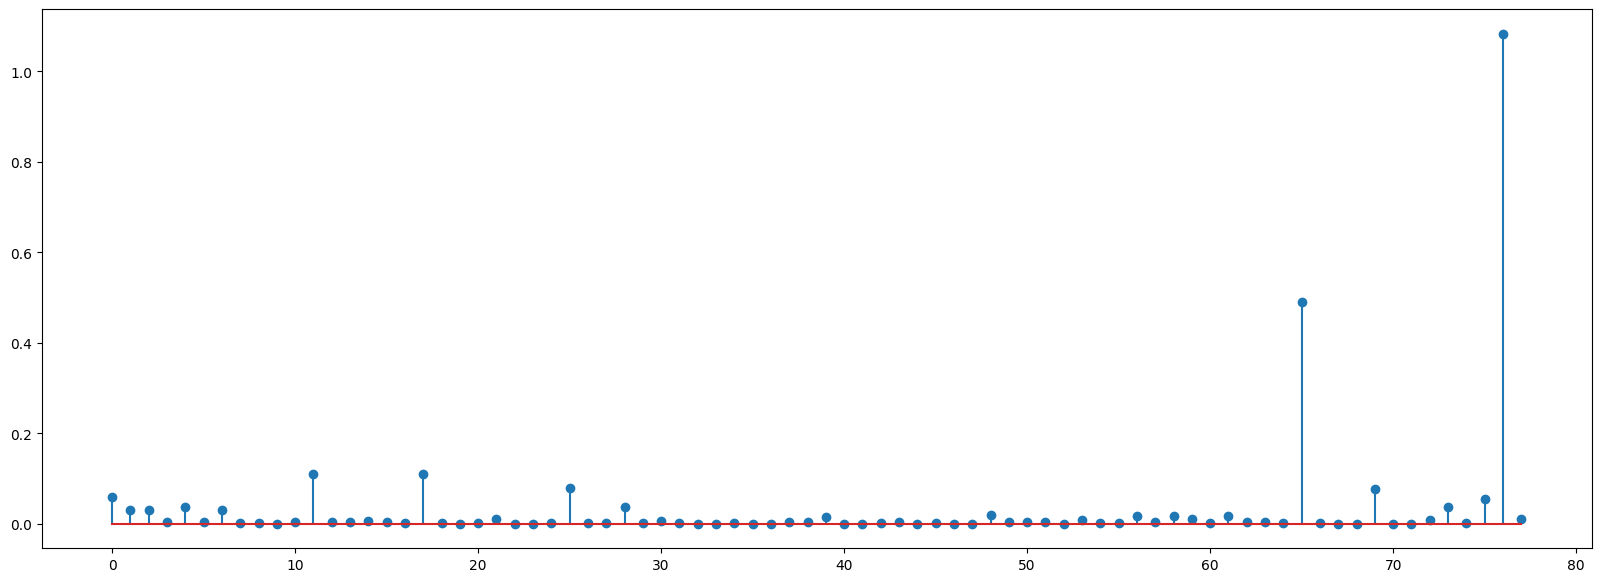

In [155]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [156]:
(np.argmax(cv),np.max(cv))

(76, 1.0834592065958688)

In [157]:
df1.drop(df1.index[76],axis=0,inplace=True)
df1 = df1.reset_index()

In [158]:
df1.drop("index",axis=1,inplace=True)

In [ ]:
#rebuild

In [159]:
mv2 = smf.ols('MPG~VOL+HP+SP',data=df1).fit()

In [160]:
mfv = mv2.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

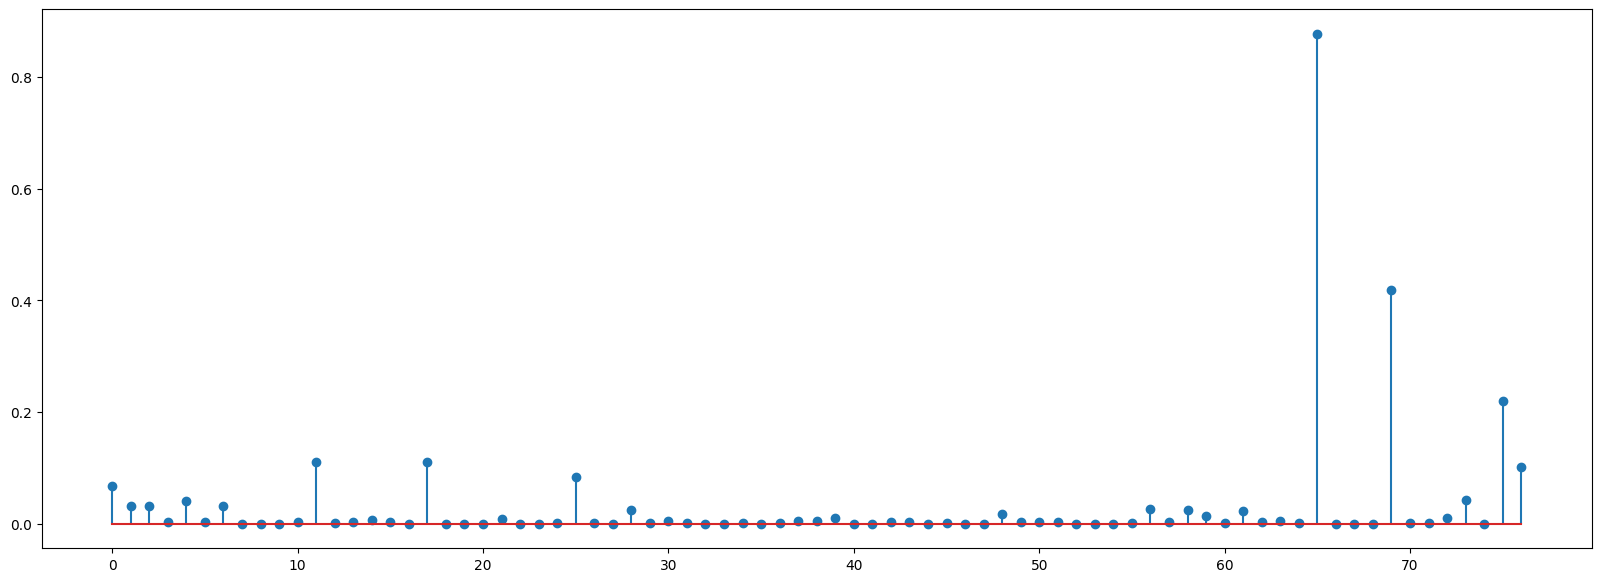

In [161]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [162]:
(np.argmax(cv),np.max(cv))

(65, 0.8774556986296758)

In [163]:
#since cv(cooks distance) <1 we can stop the diagnostics

finalmodel = smf.ols("MPG~VOL+HP+SP",data=df1).fit()

In [164]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           6.81e-32
Time:                        13:46:34   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [167]:
new = pd.DataFrame({"HP":40,"VOL":95,"SP":102,"WT":30},index=[1])

In [168]:
new

,HP,VOL,SP,WT
1,40,95,102,30


In [169]:
#predicted MPG value
finalmodel.predict(new)

1    46.035594
dtype: float64